# P02_03_EDA

In [1]:
section_fig_main_title = 'P02_03_EDA_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

In [3]:
from pandas.plotting import autocorrelation_plot


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [6]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data


In [7]:
csv_path = "../Data/Data_ICME_Edited_out_P02_02.csv"
df = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)

In [8]:
df.head(2)

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996-05-27 15:00:00,1996-05-29 03:00:00,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996-07-01 18:00:00,1996-07-02 11:00:00,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


drop the first column. 

In [9]:
df = df.drop(columns=['Disturbance Y/M/D (UT) (a)'])

In [10]:
df.head(2)

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996-05-27 15:00:00,1996-05-29 03:00:00,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996-07-01 18:00:00,1996-07-02 11:00:00,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


In [11]:
df.isnull().sum()

ICME Plasma/Field Start Y/M/D (UT) (b)        0
ICME Plasma/Field End Y/M/D (UT) (b)          0
Comp. Start (Hrs wrt. Plasma/ Field) (c)      0
Comp. End (Hrs wrt. Plasma/ Field) (c)        0
MC Start (Hrs wrt. Plasma/ Field) (d)         0
End (Hrs wrt. Plasma/ Field) (d)              0
BDE? (e)                                      0
BIF? (f)                                      0
Qual. (g)                                     0
dV (km/s) (h)                                 0
V_ICME (km/s) (i)                             0
V_max (km/s) (j)                              0
B (nT) (k)                                    0
MC? (l)                                       0
Dst (nT) (m)                                  0
V_transit (km/s) (n)                          1
LASCO CME Y/M/D (UT) (o)                    235
dtype: int64

drop the LASCO CME Y/M/D (UT) (o) columns. it has 235 null values.

In [12]:
df = df.drop(columns=['LASCO CME Y/M/D (UT) (o)'])

In [13]:
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n)
0,1996-05-27 15:00:00,1996-05-29 03:00:00,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...
1,1996-07-01 18:00:00,1996-07-02 11:00:00,...,...,0,0,N,...,3,40,360,370,11,2,-20,...
2,1996-08-07 12:00:00,1996-08-08 10:00:00,...,...,0,0,N,...,2,10,350,380,7,2,-23,...
3,1996-12-23 17:00:00,1996-12-25 11:00:00,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435
4,1997-01-10 04:00:00,1997-01-11 02:00:00,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507


let's replace the ```...``` with nan and see how many missed values exist in data.

In [14]:
df = df.replace('...', np.nan)                

In [15]:
df.isna().sum()

ICME Plasma/Field Start Y/M/D (UT) (b)        0
ICME Plasma/Field End Y/M/D (UT) (b)          0
Comp. Start (Hrs wrt. Plasma/ Field) (c)    236
Comp. End (Hrs wrt. Plasma/ Field) (c)      236
MC Start (Hrs wrt. Plasma/ Field) (d)       410
End (Hrs wrt. Plasma/ Field) (d)            410
BDE? (e)                                     12
BIF? (f)                                    400
Qual. (g)                                     0
dV (km/s) (h)                                 1
V_ICME (km/s) (i)                             0
V_max (km/s) (j)                              0
B (nT) (k)                                    0
MC? (l)                                       0
Dst (nT) (m)                                  7
V_transit (km/s) (n)                        248
dtype: int64

Ok lets's drop columns including: 

```
Comp. Start (Hrs wrt. Plasma/ Field) (c)
Comp. End (Hrs wrt. Plasma/ Field) (c)
MC Start (Hrs wrt. Plasma/ Field) (d)
End (Hrs wrt. Plasma/ Field) (d)            
BIF? (f)                                   
V_transit (km/s) (n)                        
```

In [16]:
cols = ['Comp. Start (Hrs wrt. Plasma/ Field) (c)',
'Comp. End (Hrs wrt. Plasma/ Field) (c)',
'MC Start (Hrs wrt. Plasma/ Field) (d)',
'End (Hrs wrt. Plasma/ Field) (d)',           
'BIF? (f)',                                  
'V_transit (km/s) (n)']

df = df.drop(columns=cols)
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m)
0,1996-05-27 15:00:00,1996-05-29 03:00:00,N,2,0,370,400,9,2,-33
1,1996-07-01 18:00:00,1996-07-02 11:00:00,N,3,40,360,370,11,2,-20
2,1996-08-07 12:00:00,1996-08-08 10:00:00,N,2,10,350,380,7,2,-23
3,1996-12-23 17:00:00,1996-12-25 11:00:00,N,2,20,360,420,10,2,-18
4,1997-01-10 04:00:00,1997-01-11 02:00:00,Y,1,100 S,450,460,14,2,-78


In [17]:
df.isna().sum()

ICME Plasma/Field Start Y/M/D (UT) (b)     0
ICME Plasma/Field End Y/M/D (UT) (b)       0
BDE? (e)                                  12
Qual. (g)                                  0
dV (km/s) (h)                              1
V_ICME (km/s) (i)                          0
V_max (km/s) (j)                           0
B (nT) (k)                                 0
MC? (l)                                    0
Dst (nT) (m)                               7
dtype: int64

In [18]:
df.dtypes

ICME Plasma/Field Start Y/M/D (UT) (b)    object
ICME Plasma/Field End Y/M/D (UT) (b)      object
BDE? (e)                                  object
Qual. (g)                                 object
dV (km/s) (h)                             object
V_ICME (km/s) (i)                          int64
V_max (km/s) (j)                           int64
B (nT) (k)                                 int64
MC? (l)                                   object
Dst (nT) (m)                              object
dtype: object

before working on data dtypes, let's change the dtype of start and end ICME columns and subtract to come up with a time interval.

In [19]:
df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [20]:
df.dtypes

ICME Plasma/Field Start Y/M/D (UT) (b)    datetime64[ns]
ICME Plasma/Field End Y/M/D (UT) (b)      datetime64[ns]
BDE? (e)                                          object
Qual. (g)                                         object
dV (km/s) (h)                                     object
V_ICME (km/s) (i)                                  int64
V_max (km/s) (j)                                   int64
B (nT) (k)                                         int64
MC? (l)                                           object
Dst (nT) (m)                                      object
dtype: object

time interval for each ICME.

In [21]:
df['time_interval'] = df['ICME Plasma/Field End Y/M/D (UT) (b)'] - \
                    df['ICME Plasma/Field Start Y/M/D (UT) (b)']

In [22]:
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),time_interval
0,1996-05-27 15:00:00,1996-05-29 03:00:00,N,2,0,370,400,9,2,-33,1 days 12:00:00
1,1996-07-01 18:00:00,1996-07-02 11:00:00,N,3,40,360,370,11,2,-20,0 days 17:00:00
2,1996-08-07 12:00:00,1996-08-08 10:00:00,N,2,10,350,380,7,2,-23,0 days 22:00:00
3,1996-12-23 17:00:00,1996-12-25 11:00:00,N,2,20,360,420,10,2,-18,1 days 18:00:00
4,1997-01-10 04:00:00,1997-01-11 02:00:00,Y,1,100 S,450,460,14,2,-78,0 days 22:00:00


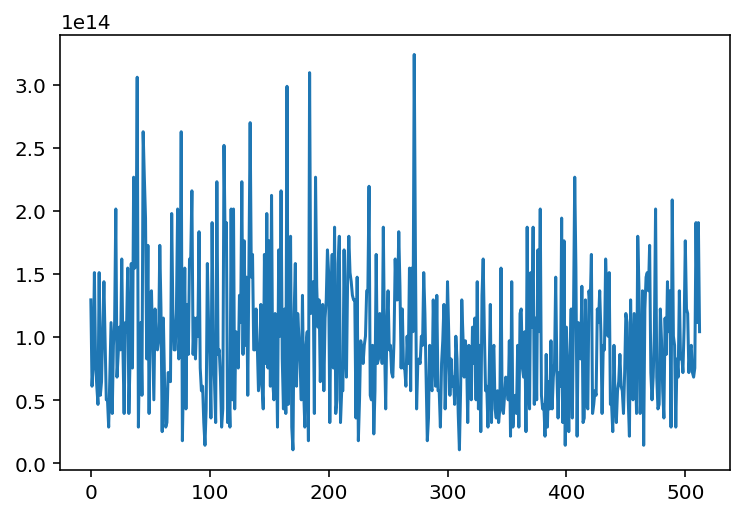

In [23]:
df['time_interval'].plot()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype          
---  ------                                  --------------  -----          
 0   ICME Plasma/Field Start Y/M/D (UT) (b)  513 non-null    datetime64[ns] 
 1   ICME Plasma/Field End Y/M/D (UT) (b)    513 non-null    datetime64[ns] 
 2   BDE? (e)                                501 non-null    object         
 3   Qual. (g)                               513 non-null    object         
 4   dV (km/s) (h)                           512 non-null    object         
 5   V_ICME (km/s) (i)                       513 non-null    int64          
 6   V_max (km/s) (j)                        513 non-null    int64          
 7   B (nT) (k)                              513 non-null    int64          
 8   MC? (l)                                 513 non-null    object         
 9   Dst (nT) (m)                            506

Let's add a new column with flaot format and normalized values. 

In [25]:
df['time_interval'].min()

Timedelta('0 days 03:00:00')

A minimum of 3 hours is used for normalization purposes.

Remember that later any new data should be normalized based on 3 hours and used as a feature.

In [26]:
 df['Normalized_time_interval'] = (df['time_interval'] - df['time_interval'].min())  / np.timedelta64(1,'D')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype          
---  ------                                  --------------  -----          
 0   ICME Plasma/Field Start Y/M/D (UT) (b)  513 non-null    datetime64[ns] 
 1   ICME Plasma/Field End Y/M/D (UT) (b)    513 non-null    datetime64[ns] 
 2   BDE? (e)                                501 non-null    object         
 3   Qual. (g)                               513 non-null    object         
 4   dV (km/s) (h)                           512 non-null    object         
 5   V_ICME (km/s) (i)                       513 non-null    int64          
 6   V_max (km/s) (j)                        513 non-null    int64          
 7   B (nT) (k)                              513 non-null    int64          
 8   MC? (l)                                 513 non-null    object         
 9   Dst (nT) (m)                            506

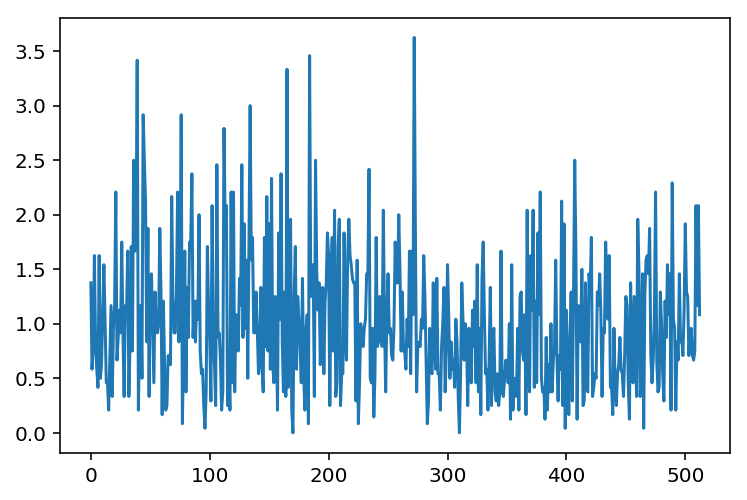

In [28]:
df['Normalized_time_interval'].plot()

In [29]:
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),time_interval,Normalized_time_interval
0,1996-05-27 15:00:00,1996-05-29 03:00:00,N,2,0,370,400,9,2,-33,1 days 12:00:00,1.375000
1,1996-07-01 18:00:00,1996-07-02 11:00:00,N,3,40,360,370,11,2,-20,0 days 17:00:00,0.583333
2,1996-08-07 12:00:00,1996-08-08 10:00:00,N,2,10,350,380,7,2,-23,0 days 22:00:00,0.791667
3,1996-12-23 17:00:00,1996-12-25 11:00:00,N,2,20,360,420,10,2,-18,1 days 18:00:00,1.625000
4,1997-01-10 04:00:00,1997-01-11 02:00:00,Y,1,100 S,450,460,14,2,-78,0 days 22:00:00,0.791667


In [30]:
df = df.drop(columns=['time_interval'])

In [31]:
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
0,1996-05-27 15:00:00,1996-05-29 03:00:00,N,2,0,370,400,9,2,-33,1.375000
1,1996-07-01 18:00:00,1996-07-02 11:00:00,N,3,40,360,370,11,2,-20,0.583333
2,1996-08-07 12:00:00,1996-08-08 10:00:00,N,2,10,350,380,7,2,-23,0.791667
3,1996-12-23 17:00:00,1996-12-25 11:00:00,N,2,20,360,420,10,2,-18,1.625000
4,1997-01-10 04:00:00,1997-01-11 02:00:00,Y,1,100 S,450,460,14,2,-78,0.791667


In [32]:
df.isna().sum()

ICME Plasma/Field Start Y/M/D (UT) (b)     0
ICME Plasma/Field End Y/M/D (UT) (b)       0
BDE? (e)                                  12
Qual. (g)                                  0
dV (km/s) (h)                              1
V_ICME (km/s) (i)                          0
V_max (km/s) (j)                           0
B (nT) (k)                                 0
MC? (l)                                    0
Dst (nT) (m)                               7
Normalized_time_interval                   0
dtype: int64

In [33]:
df['BDE? (e)'].unique()

array(['N', 'Y', nan, 'SEP'], dtype=object)

let's drop those rows with nan.

In [34]:
df = df.dropna()

In [35]:
df.isna().sum()

ICME Plasma/Field Start Y/M/D (UT) (b)    0
ICME Plasma/Field End Y/M/D (UT) (b)      0
BDE? (e)                                  0
Qual. (g)                                 0
dV (km/s) (h)                             0
V_ICME (km/s) (i)                         0
V_max (km/s) (j)                          0
B (nT) (k)                                0
MC? (l)                                   0
Dst (nT) (m)                              0
Normalized_time_interval                  0
dtype: int64

In [36]:
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
0,1996-05-27 15:00:00,1996-05-29 03:00:00,N,2,0,370,400,9,2,-33,1.375000
1,1996-07-01 18:00:00,1996-07-02 11:00:00,N,3,40,360,370,11,2,-20,0.583333
2,1996-08-07 12:00:00,1996-08-08 10:00:00,N,2,10,350,380,7,2,-23,0.791667
3,1996-12-23 17:00:00,1996-12-25 11:00:00,N,2,20,360,420,10,2,-18,1.625000
4,1997-01-10 04:00:00,1997-01-11 02:00:00,Y,1,100 S,450,460,14,2,-78,0.791667


In [37]:
df.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)', 'BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval'],
      dtype='object')

In [38]:
df.dtypes

ICME Plasma/Field Start Y/M/D (UT) (b)    datetime64[ns]
ICME Plasma/Field End Y/M/D (UT) (b)      datetime64[ns]
BDE? (e)                                          object
Qual. (g)                                         object
dV (km/s) (h)                                     object
V_ICME (km/s) (i)                                  int64
V_max (km/s) (j)                                   int64
B (nT) (k)                                         int64
MC? (l)                                           object
Dst (nT) (m)                                      object
Normalized_time_interval                         float64
dtype: object

let's turn the object (strings) into values. The number of string are counted and a number is assigned.

columns including ``` 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)', 'Normalized_time_interval'``` are already int64 and flaot64. No need for turning catogorical to value.

In [39]:
cols = ['BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)',
       'MC? (l)', 'Dst (nT) (m)']

for col in cols:    
    print('number of unique values for ', 
          col, '=  ', df[col].value_counts().count())

number of unique values for  BDE? (e) =   3
number of unique values for  Qual. (g) =   5
number of unique values for  dV (km/s) (h) =   62
number of unique values for  MC? (l) =   4
number of unique values for  Dst (nT) (m) =   221


In [40]:
save_coded_values = []
for col in cols:
    
    
    labels = df[col].astype('category').cat.categories.tolist()
    replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
#     print(replace_map_comp1)
    save_coded_values.append(replace_map_comp)
    df.replace(replace_map_comp, inplace=True)

In [41]:
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
0,1996-05-27 15:00:00,1996-05-29 03:00:00,1,2,1,370,400,9,3,117,1.375000
1,1996-07-01 18:00:00,1996-07-02 11:00:00,1,4,44,360,370,11,3,78,0.583333
2,1996-08-07 12:00:00,1996-08-08 10:00:00,1,2,2,350,380,7,3,88,0.791667
3,1996-12-23 17:00:00,1996-12-25 11:00:00,1,2,22,360,420,10,3,69,1.625000
4,1997-01-10 04:00:00,1997-01-11 02:00:00,3,1,4,450,460,14,3,191,0.791667


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 511
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ICME Plasma/Field Start Y/M/D (UT) (b)  493 non-null    datetime64[ns]
 1   ICME Plasma/Field End Y/M/D (UT) (b)    493 non-null    datetime64[ns]
 2   BDE? (e)                                493 non-null    int64         
 3   Qual. (g)                               493 non-null    int64         
 4   dV (km/s) (h)                           493 non-null    int64         
 5   V_ICME (km/s) (i)                       493 non-null    int64         
 6   V_max (km/s) (j)                        493 non-null    int64         
 7   B (nT) (k)                              493 non-null    int64         
 8   MC? (l)                                 493 non-null    int64         
 9   Dst (nT) (m)                            493 non-null  

Nice. Now we have a data set with numerical values ready for ML.

Checking out decoded values. Remember, any input values should be decoded before feeding into the ML. The ML uses decoded values for the fitting purposes.

In [61]:
# save_coded_values

### Save the coded parameters in json format so later we can call it and check out and code and decode it.


In [84]:
# https://stackoverflow.com/questions/27745500/how-to-save-a-list-to-a-file-and-read-it-as-a-list-type
import json

coded_vals=save_coded_values

with open("../Data/save_coded_values_P02_03_EDA.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable
    json.dump(coded_vals, f, indent=2) 



In [85]:
with open("../Data/save_coded_values_P02_03_EDA.json", 'r') as f:
    coded_vals = json.load(f)

print(coded_vals)

[{'BDE? (e)': {'N': 1, 'SEP': 2, 'Y': 3}}, {'Qual. (g)': {'1': 1, '2': 2, '2W': 3, '3': 4, '3W': 5}}, {'dV (km/s) (h)': {'0': 1, '10': 2, '100': 3, '100 S': 4, '110': 5, '110 S': 6, '120': 7, '120 S': 8, '130': 9, '130 S': 10, '140': 11, '140 S': 12, '150': 13, '150  S': 14, '150 S': 15, '160 S': 16, '170': 17, '170 S': 18, '180': 19, '180 S': 20, '190': 21, '20': 22, '20 S': 23, '200': 24, '200 S': 25, '210 S': 26, '220': 27, '220 S': 28, '230': 29, '230 S': 30, '240 S': 31, '250 S': 32, '250 Wv': 33, '260 S': 34, '270': 35, '280': 36, '30': 37, '30 S': 38, '300  S': 39, '300 S': 40, '320 S': 41, '340 S': 42, '350 S': 43, '40': 44, '40 S': 45, '400 S': 46, '50': 47, '50 S': 48, '550 S': 49, '60': 50, '60 S': 51, '650 S': 52, '70': 53, '70  S': 54, '70 S': 55, '750 S': 56, '80': 57, '80 S': 58, '90': 59, '90  S': 60, '90 S': 61, '900 S': 62}}, {'MC? (l)': {'0': 1, '1': 2, '2': 3, '2H': 4}}, {'Dst (nT) (m)': {'+1': 1, '+16 P': 2, '+9': 3, '-1': 4, '-10': 5, '-10 P': 6, '-10 Q': 7, '-100

In [44]:
save_coded_values[1]

{'Qual. (g)': {'1': 1, '2': 2, '2W': 3, '3': 4, '3W': 5}}

Save the df.

In [45]:
file_path = "../Data/"
file_name = "Data_ICME_Edited_Decoded_out_P02_03.csv"
df.to_csv(file_path+file_name, index=False)